# Unsupervised Learning - Checking the swiss food dataset

This notebook is used to check the preprocessed swiss food dataset and some of its categories, how would they cluster. I used only the first 120 rows (1-120) and changed the categories according to the dictionary below.

In [1]:
import pandas as  pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from umap import  UMAP

c:\Users\dorie\anaconda3\envs\ml4food_1\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load the data

In [2]:
dataset = pd.read_csv('../data/swiss_food_composition_database_proc.csv')

In [3]:
#dataset = dataset.iloc[1:121, :] # working only with the first 120 food samples
dataset

,f_ID,f_name,f_category,f_energy_kcal,f_fat_g,f_fatty_acids_sat_g,f_fatty_acids_monounsat_g,f_fatty_acids_polyunsat_g,f_cholesterol_mg,f_carbohydrates_g,...,f_potassium_mg,f_sodium_mg,f_chloride_mg,f_calcium_mg,f_magnesium_mg,f_phosphorus_mg,f_iron_mg,f_iodide_µg,f_zinc_mg,f_selenium_µg
0,10533,Agar Agar,Various/Gelling and binding agents,160,0.2,NaN,NaN,NaN,NaN,0.0,...,52.0,130.0,NaN,660.0,100.0,34.0,4.5,NaN,1.5,NaN
1,10536,Agave syrup,Sweets/Sugar and sweeteners,293,0.0,0.0,NaN,NaN,NaN,73.1,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,273,Almond,"Nuts, seeds and oleaginous fruit",624,52.1,4.1,31.4,11.4,0.0,7.8,...,740.0,1.1,40.0,270.0,240.0,510.0,3.3,0.2,3.3,2.2
3,278,"Almond, dry roasted, salted","Savoury snacks/Salted nuts, seeds and kernels",637,52.5,4.1,33.1,13.0,0.0,10.1,...,710.0,230.0,1190.0,270.0,280.0,470.0,3.7,2.4,3.3,2.0
4,269,"Almond, roasted, salted","Savoury snacks/Salted nuts, seeds and kernels",649,55.2,4.2,34.8,13.5,0.0,7.2,...,670.0,330.0,1190.0,240.0,270.0,470.0,3.3,2.4,3.1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,1661,"Zucchini piccata, prepared",Prepared dishes/Other savoury dishes,124,8.0,2.2,4.0,1.0,65.0,6.6,...,210.0,93.0,150.0,76.0,24.0,97.0,0.9,11.0,0.7,NaN
1088,1657,"Zucchini slices, breaded, prepared",Prepared dishes/Other savoury dishes,127,5.5,0.7,3.4,0.9,44.0,13.5,...,210.0,89.0,160.0,28.0,24.0,65.0,1.0,7.3,0.5,NaN
1089,367,"Zucchini, raw",Vegetables/Fresh vegetables,19,0.2,0.0,0.0,0.1,0.0,2.0,...,230.0,3.0,24.0,19.0,23.0,31.0,0.8,2.3,0.2,NaN
1090,1654,"Zucchini, steamed (without addition of salt)",Vegetables/Cooked vegetables (incl. cans),20,0.2,0.0,0.0,0.1,0.0,2.2,...,220.0,2.9,26.0,21.0,24.0,33.0,0.7,2.5,0.3,NaN


## Add the new category column

This step is already done in the Clean_Dataset.ipynb.

In [4]:
# new_categories_dict = { 'dairy':'dairy', 'non-alcoholic beverages':'non_alcoholic_beverages', 'alcoholic beverages':'alcoholic_beverages',
#                         'sweet':'sweets', 'fruit':'fruits', 'herbs':'herbs', 'vegetable':'vegetables',
#                         'cereal':'cereals', 'bread':'bread', 'sauces':'sauce', 'meat':'meat',
#                         'nut':'nuts'}
# keys = new_categories_dict.keys()
# n_cols = len(dataset.columns)
# dataset['f_category_new'] = np.zeros((dataset.shape[0], 1))

# for i, value in enumerate(dataset['f_category']):
#     for word in keys:
#         if word in value.lower():
#             dataset.iloc[i, n_cols] = new_categories_dict[word]
#             break
#         else:
#             dataset.iloc[i, n_cols] = 'other'


dataset

,f_ID,f_name,f_category,f_energy_kcal,f_fat_g,f_fatty_acids_sat_g,f_fatty_acids_monounsat_g,f_fatty_acids_polyunsat_g,f_cholesterol_mg,f_carbohydrates_g,...,f_sodium_mg,f_chloride_mg,f_calcium_mg,f_magnesium_mg,f_phosphorus_mg,f_iron_mg,f_iodide_µg,f_zinc_mg,f_selenium_µg,f_category_new
0,10533,Agar Agar,Various/Gelling and binding agents,160,0.2,NaN,NaN,NaN,NaN,0.0,...,130.0,NaN,660.0,100.0,34.0,4.5,NaN,1.5,NaN,other
1,10536,Agave syrup,Sweets/Sugar and sweeteners,293,0.0,0.0,NaN,NaN,NaN,73.1,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sweets
2,273,Almond,"Nuts, seeds and oleaginous fruit",624,52.1,4.1,31.4,11.4,0.0,7.8,...,1.1,40.0,270.0,240.0,510.0,3.3,0.2,3.3,2.2,fruits
3,278,"Almond, dry roasted, salted","Savoury snacks/Salted nuts, seeds and kernels",637,52.5,4.1,33.1,13.0,0.0,10.1,...,230.0,1190.0,270.0,280.0,470.0,3.7,2.4,3.3,2.0,nuts
4,269,"Almond, roasted, salted","Savoury snacks/Salted nuts, seeds and kernels",649,55.2,4.2,34.8,13.5,0.0,7.2,...,330.0,1190.0,240.0,270.0,470.0,3.3,2.4,3.1,2.0,nuts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,1661,"Zucchini piccata, prepared",Prepared dishes/Other savoury dishes,124,8.0,2.2,4.0,1.0,65.0,6.6,...,93.0,150.0,76.0,24.0,97.0,0.9,11.0,0.7,NaN,other
1088,1657,"Zucchini slices, breaded, prepared",Prepared dishes/Other savoury dishes,127,5.5,0.7,3.4,0.9,44.0,13.5,...,89.0,160.0,28.0,24.0,65.0,1.0,7.3,0.5,NaN,other
1089,367,"Zucchini, raw",Vegetables/Fresh vegetables,19,0.2,0.0,0.0,0.1,0.0,2.0,...,3.0,24.0,19.0,23.0,31.0,0.8,2.3,0.2,NaN,vegetables
1090,1654,"Zucchini, steamed (without addition of salt)",Vegetables/Cooked vegetables (incl. cans),20,0.2,0.0,0.0,0.1,0.0,2.2,...,2.9,26.0,21.0,24.0,33.0,0.7,2.5,0.3,NaN,vegetables


In [5]:
new_df = dataset.iloc[:, 2:]
new_df

,f_category,f_energy_kcal,f_fat_g,f_fatty_acids_sat_g,f_fatty_acids_monounsat_g,f_fatty_acids_polyunsat_g,f_cholesterol_mg,f_carbohydrates_g,f_sugars_g,f_starch_g,...,f_sodium_mg,f_chloride_mg,f_calcium_mg,f_magnesium_mg,f_phosphorus_mg,f_iron_mg,f_iodide_µg,f_zinc_mg,f_selenium_µg,f_category_new
0,Various/Gelling and binding agents,160,0.2,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,130.0,NaN,660.0,100.0,34.0,4.5,NaN,1.5,NaN,other
1,Sweets/Sugar and sweeteners,293,0.0,0.0,NaN,NaN,NaN,73.1,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sweets
2,"Nuts, seeds and oleaginous fruit",624,52.1,4.1,31.4,11.4,0.0,7.8,6.6,0.6,...,1.1,40.0,270.0,240.0,510.0,3.3,0.2,3.3,2.2,fruits
3,"Savoury snacks/Salted nuts, seeds and kernels",637,52.5,4.1,33.1,13.0,0.0,10.1,4.9,0.7,...,230.0,1190.0,270.0,280.0,470.0,3.7,2.4,3.3,2.0,nuts
4,"Savoury snacks/Salted nuts, seeds and kernels",649,55.2,4.2,34.8,13.5,0.0,7.2,4.6,0.6,...,330.0,1190.0,240.0,270.0,470.0,3.3,2.4,3.1,2.0,nuts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,Prepared dishes/Other savoury dishes,124,8.0,2.2,4.0,1.0,65.0,6.6,1.8,4.8,...,93.0,150.0,76.0,24.0,97.0,0.9,11.0,0.7,NaN,other
1088,Prepared dishes/Other savoury dishes,127,5.5,0.7,3.4,0.9,44.0,13.5,2.1,11.3,...,89.0,160.0,28.0,24.0,65.0,1.0,7.3,0.5,NaN,other
1089,Vegetables/Fresh vegetables,19,0.2,0.0,0.0,0.1,0.0,2.0,1.9,0.1,...,3.0,24.0,19.0,23.0,31.0,0.8,2.3,0.2,NaN,vegetables
1090,Vegetables/Cooked vegetables (incl. cans),20,0.2,0.0,0.0,0.1,0.0,2.2,2.1,0.1,...,2.9,26.0,21.0,24.0,33.0,0.7,2.5,0.3,NaN,vegetables


In [6]:
new_df.replace('n.d.', np.nan, inplace=True)

In [7]:
new_df.isna().any(axis=1).sum() # 75 out of 120 is too much to drop them, imputing the only way
# 779 out of 1092 samples have missing values
# 33 out of 41 columns have at least 1 value missing

779

Imputing with the mean values per column

In [8]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(new_df.iloc[:, 1:-1])
new_df.iloc[:, 1:-1] = imputer.transform(new_df.iloc[:, 1:-1])
new_df

C:\Users\dorie\AppData\Local\Temp\ipykernel_11792\2497219684.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  new_df.iloc[:, 1:-1] = imputer.transform(new_df.iloc[:, 1:-1])


,f_category,f_energy_kcal,f_fat_g,f_fatty_acids_sat_g,f_fatty_acids_monounsat_g,f_fatty_acids_polyunsat_g,f_cholesterol_mg,f_carbohydrates_g,f_sugars_g,f_starch_g,...,f_sodium_mg,f_chloride_mg,f_calcium_mg,f_magnesium_mg,f_phosphorus_mg,f_iron_mg,f_iodide_µg,f_zinc_mg,f_selenium_µg,f_category_new
0,Various/Gelling and binding agents,160.0,0.2,4.035053,4.143689,2.158712,37.357408,0.0,6.698438,9.637481,...,130.0,682.579685,660.000,100.000000,34.000000,4.500000,16.703925,1.500000,6.590278,other
1,Sweets/Sugar and sweeteners,293.0,0.0,0.000000,4.143689,2.158712,37.357408,73.1,6.698438,9.637481,...,4.0,682.579685,74.623,33.370324,146.316114,1.446551,16.703925,1.319707,6.590278,sweets
2,"Nuts, seeds and oleaginous fruit",624.0,52.1,4.100000,31.400000,11.400000,0.000000,7.8,6.600000,0.600000,...,1.1,40.000000,270.000,240.000000,510.000000,3.300000,0.200000,3.300000,2.200000,fruits
3,"Savoury snacks/Salted nuts, seeds and kernels",637.0,52.5,4.100000,33.100000,13.000000,0.000000,10.1,4.900000,0.700000,...,230.0,1190.000000,270.000,280.000000,470.000000,3.700000,2.400000,3.300000,2.000000,nuts
4,"Savoury snacks/Salted nuts, seeds and kernels",649.0,55.2,4.200000,34.800000,13.500000,0.000000,7.2,4.600000,0.600000,...,330.0,1190.000000,240.000,270.000000,470.000000,3.300000,2.400000,3.100000,2.000000,nuts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,Prepared dishes/Other savoury dishes,124.0,8.0,2.200000,4.000000,1.000000,65.000000,6.6,1.800000,4.800000,...,93.0,150.000000,76.000,24.000000,97.000000,0.900000,11.000000,0.700000,6.590278,other
1088,Prepared dishes/Other savoury dishes,127.0,5.5,0.700000,3.400000,0.900000,44.000000,13.5,2.100000,11.300000,...,89.0,160.000000,28.000,24.000000,65.000000,1.000000,7.300000,0.500000,6.590278,other
1089,Vegetables/Fresh vegetables,19.0,0.2,0.000000,0.000000,0.100000,0.000000,2.0,1.900000,0.100000,...,3.0,24.000000,19.000,23.000000,31.000000,0.800000,2.300000,0.200000,6.590278,vegetables
1090,Vegetables/Cooked vegetables (incl. cans),20.0,0.2,0.000000,0.000000,0.100000,0.000000,2.2,2.100000,0.100000,...,2.9,26.000000,21.000,24.000000,33.000000,0.700000,2.500000,0.300000,6.590278,vegetables


Scaling the values before applying dimensionality reduction.

In [9]:
sc = StandardScaler()
new_df_scaled = sc.fit_transform(new_df.iloc[:, 1:-1])

# show the output of some columns after scaling
new_df_scaled = pd.DataFrame(new_df_scaled, columns=new_df.columns[1:-1])
new_df_scaled = new_df_scaled.reset_index(drop=True)
new_df_scaled

,f_energy_kcal,f_fat_g,f_fatty_acids_sat_g,f_fatty_acids_monounsat_g,f_fatty_acids_polyunsat_g,f_cholesterol_mg,f_carbohydrates_g,f_sugars_g,f_starch_g,f_fibres_g,...,f_potassium_mg,f_sodium_mg,f_chloride_mg,f_calcium_mg,f_magnesium_mg,f_phosphorus_mg,f_iron_mg,f_iodide_µg,f_zinc_mg,f_selenium_µg
0,-0.305348,-0.633897,0.000000,0.000000,0.000000,1.064358e-16,-0.756715,-6.193194e-17,-1.060603e-16,15.229373,...,-0.714734,-0.117063,2.601199e-17,3.770388e+00,1.199400e+00,-0.702740,1.092200,0.000000,0.116076,0.000000
1,0.451655,-0.645310,-0.567714,0.000000,0.000000,1.064358e-16,2.564921,-6.193194e-17,-1.060603e-16,-0.508643,...,0.000000,-0.160324,2.601199e-17,-9.153151e-17,1.279047e-16,0.000000,0.000000,0.000000,0.000000,0.000000
2,2.335624,2.327921,0.009138,3.630701,1.416323,-5.595955e-01,-0.402286,-6.863993e-03,-5.395974e-01,1.742679,...,1.629755,-0.161319,-1.470247e-01,1.258415e+00,3.719539e+00,2.275498,0.662967,-0.087816,1.274952,-0.510925
3,2.409617,2.350748,0.009138,3.857151,1.661539,-5.595955e-01,-0.297775,-1.254036e-01,-5.336267e-01,1.806396,...,1.527524,-0.082729,1.160997e-01,1.258415e+00,4.439579e+00,2.025226,0.806045,-0.076110,1.274952,-0.534200
4,2.477918,2.504831,0.023207,4.083601,1.738170,-5.595955e-01,-0.429550,-1.463223e-01,-5.395974e-01,1.721440,...,1.391216,-0.048395,1.160997e-01,1.065186e+00,4.259569e+00,2.025226,0.662967,-0.076110,1.146188,-0.534200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,-0.510251,-0.188768,-0.258184,-0.019140,-0.177585,4.140724e-01,-0.456814,-3.415640e-01,-2.888296e-01,-0.275015,...,-0.176319,-0.129766,-1.218563e-01,8.869200e-03,-1.686751e-01,-0.308561,-0.195498,-0.030350,-0.398979,0.000000
1088,-0.493176,-0.331437,-0.469227,-0.099064,-0.192911,9.950276e-02,-0.143280,-3.206453e-01,9.926339e-02,-0.190060,...,-0.176319,-0.131140,-1.195683e-01,-3.002967e-01,-1.686751e-01,-0.508779,-0.159728,-0.050038,-0.527743,0.000000
1089,-1.107885,-0.633897,-0.567714,-0.551964,-0.315519,-5.595955e-01,-0.665836,-3.345911e-01,-5.694507e-01,-0.296254,...,-0.108166,-0.160667,-1.506856e-01,-3.582654e-01,-1.866761e-01,-0.721510,-0.231267,-0.076642,-0.720889,0.000000
1090,-1.102193,-0.633897,-0.567714,-0.551964,-0.315519,-5.595955e-01,-0.656748,-3.206453e-01,-5.694507e-01,-0.275015,...,-0.142243,-0.160701,-1.502280e-01,-3.453834e-01,-1.686751e-01,-0.708996,-0.267037,-0.075578,-0.656507,0.000000


In [10]:
new_df = new_df.reset_index(drop=True)
new_df

,f_category,f_energy_kcal,f_fat_g,f_fatty_acids_sat_g,f_fatty_acids_monounsat_g,f_fatty_acids_polyunsat_g,f_cholesterol_mg,f_carbohydrates_g,f_sugars_g,f_starch_g,...,f_sodium_mg,f_chloride_mg,f_calcium_mg,f_magnesium_mg,f_phosphorus_mg,f_iron_mg,f_iodide_µg,f_zinc_mg,f_selenium_µg,f_category_new
0,Various/Gelling and binding agents,160.0,0.2,4.035053,4.143689,2.158712,37.357408,0.0,6.698438,9.637481,...,130.0,682.579685,660.000,100.000000,34.000000,4.500000,16.703925,1.500000,6.590278,other
1,Sweets/Sugar and sweeteners,293.0,0.0,0.000000,4.143689,2.158712,37.357408,73.1,6.698438,9.637481,...,4.0,682.579685,74.623,33.370324,146.316114,1.446551,16.703925,1.319707,6.590278,sweets
2,"Nuts, seeds and oleaginous fruit",624.0,52.1,4.100000,31.400000,11.400000,0.000000,7.8,6.600000,0.600000,...,1.1,40.000000,270.000,240.000000,510.000000,3.300000,0.200000,3.300000,2.200000,fruits
3,"Savoury snacks/Salted nuts, seeds and kernels",637.0,52.5,4.100000,33.100000,13.000000,0.000000,10.1,4.900000,0.700000,...,230.0,1190.000000,270.000,280.000000,470.000000,3.700000,2.400000,3.300000,2.000000,nuts
4,"Savoury snacks/Salted nuts, seeds and kernels",649.0,55.2,4.200000,34.800000,13.500000,0.000000,7.2,4.600000,0.600000,...,330.0,1190.000000,240.000,270.000000,470.000000,3.300000,2.400000,3.100000,2.000000,nuts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,Prepared dishes/Other savoury dishes,124.0,8.0,2.200000,4.000000,1.000000,65.000000,6.6,1.800000,4.800000,...,93.0,150.000000,76.000,24.000000,97.000000,0.900000,11.000000,0.700000,6.590278,other
1088,Prepared dishes/Other savoury dishes,127.0,5.5,0.700000,3.400000,0.900000,44.000000,13.5,2.100000,11.300000,...,89.0,160.000000,28.000,24.000000,65.000000,1.000000,7.300000,0.500000,6.590278,other
1089,Vegetables/Fresh vegetables,19.0,0.2,0.000000,0.000000,0.100000,0.000000,2.0,1.900000,0.100000,...,3.0,24.000000,19.000,23.000000,31.000000,0.800000,2.300000,0.200000,6.590278,vegetables
1090,Vegetables/Cooked vegetables (incl. cans),20.0,0.2,0.000000,0.000000,0.100000,0.000000,2.2,2.100000,0.100000,...,2.9,26.000000,21.000,24.000000,33.000000,0.700000,2.500000,0.300000,6.590278,vegetables


In [11]:
new_df_scaled = pd.concat([new_df.iloc[:, -1], new_df_scaled], axis=1)
new_df_scaled

,f_category_new,f_energy_kcal,f_fat_g,f_fatty_acids_sat_g,f_fatty_acids_monounsat_g,f_fatty_acids_polyunsat_g,f_cholesterol_mg,f_carbohydrates_g,f_sugars_g,f_starch_g,...,f_potassium_mg,f_sodium_mg,f_chloride_mg,f_calcium_mg,f_magnesium_mg,f_phosphorus_mg,f_iron_mg,f_iodide_µg,f_zinc_mg,f_selenium_µg
0,other,-0.305348,-0.633897,0.000000,0.000000,0.000000,1.064358e-16,-0.756715,-6.193194e-17,-1.060603e-16,...,-0.714734,-0.117063,2.601199e-17,3.770388e+00,1.199400e+00,-0.702740,1.092200,0.000000,0.116076,0.000000
1,sweets,0.451655,-0.645310,-0.567714,0.000000,0.000000,1.064358e-16,2.564921,-6.193194e-17,-1.060603e-16,...,0.000000,-0.160324,2.601199e-17,-9.153151e-17,1.279047e-16,0.000000,0.000000,0.000000,0.000000,0.000000
2,fruits,2.335624,2.327921,0.009138,3.630701,1.416323,-5.595955e-01,-0.402286,-6.863993e-03,-5.395974e-01,...,1.629755,-0.161319,-1.470247e-01,1.258415e+00,3.719539e+00,2.275498,0.662967,-0.087816,1.274952,-0.510925
3,nuts,2.409617,2.350748,0.009138,3.857151,1.661539,-5.595955e-01,-0.297775,-1.254036e-01,-5.336267e-01,...,1.527524,-0.082729,1.160997e-01,1.258415e+00,4.439579e+00,2.025226,0.806045,-0.076110,1.274952,-0.534200
4,nuts,2.477918,2.504831,0.023207,4.083601,1.738170,-5.595955e-01,-0.429550,-1.463223e-01,-5.395974e-01,...,1.391216,-0.048395,1.160997e-01,1.065186e+00,4.259569e+00,2.025226,0.662967,-0.076110,1.146188,-0.534200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,other,-0.510251,-0.188768,-0.258184,-0.019140,-0.177585,4.140724e-01,-0.456814,-3.415640e-01,-2.888296e-01,...,-0.176319,-0.129766,-1.218563e-01,8.869200e-03,-1.686751e-01,-0.308561,-0.195498,-0.030350,-0.398979,0.000000
1088,other,-0.493176,-0.331437,-0.469227,-0.099064,-0.192911,9.950276e-02,-0.143280,-3.206453e-01,9.926339e-02,...,-0.176319,-0.131140,-1.195683e-01,-3.002967e-01,-1.686751e-01,-0.508779,-0.159728,-0.050038,-0.527743,0.000000
1089,vegetables,-1.107885,-0.633897,-0.567714,-0.551964,-0.315519,-5.595955e-01,-0.665836,-3.345911e-01,-5.694507e-01,...,-0.108166,-0.160667,-1.506856e-01,-3.582654e-01,-1.866761e-01,-0.721510,-0.231267,-0.076642,-0.720889,0.000000
1090,vegetables,-1.102193,-0.633897,-0.567714,-0.551964,-0.315519,-5.595955e-01,-0.656748,-3.206453e-01,-5.694507e-01,...,-0.142243,-0.160701,-1.502280e-01,-3.453834e-01,-1.686751e-01,-0.708996,-0.267037,-0.075578,-0.656507,0.000000


In [12]:
def visualize_data(data:pd.DataFrame, title:str):
    sns.set(
    rc={'figure.figsize':(7, 5), 
        'font.family': ['DejaVu Sans']}, 
    style='white'
)
    with sns.plotting_context("notebook", font_scale=1.3):
        ax = sns.scatterplot(
        data=data,
        x='dim_1', y='dim_2',
        alpha=1, hue='f_category_new',
        palette='tab10'
    )
        ax.set(title=title)
        sns.move_legend(ax, "center left", bbox_to_anchor=(1, 0.5))


Now we apply PCA and visualize the results. 

In [13]:
pca = PCA(n_components=2)
pca_components = pd.DataFrame(
    pca.fit_transform(new_df_scaled.iloc[:, 1:]), 
    columns=['dim_1', 'dim_2']
)
data_after_pca = pd.concat([pca_components, new_df_scaled.iloc[:, 0]], axis=1)

In [14]:
data_after_pca

,dim_1,dim_2,f_category_new
0,2.057315,-2.189864,other
1,-0.335574,-0.086908,sweets
2,4.246029,-6.255178,fruits
3,4.687267,-6.300465,nuts
4,4.035052,-6.639042,nuts
...,...,...,...
1087,-0.980697,0.840752,other
1088,-1.208070,0.804249,other
1089,-1.869140,1.752854,vegetables
1090,-1.901060,1.729784,vegetables


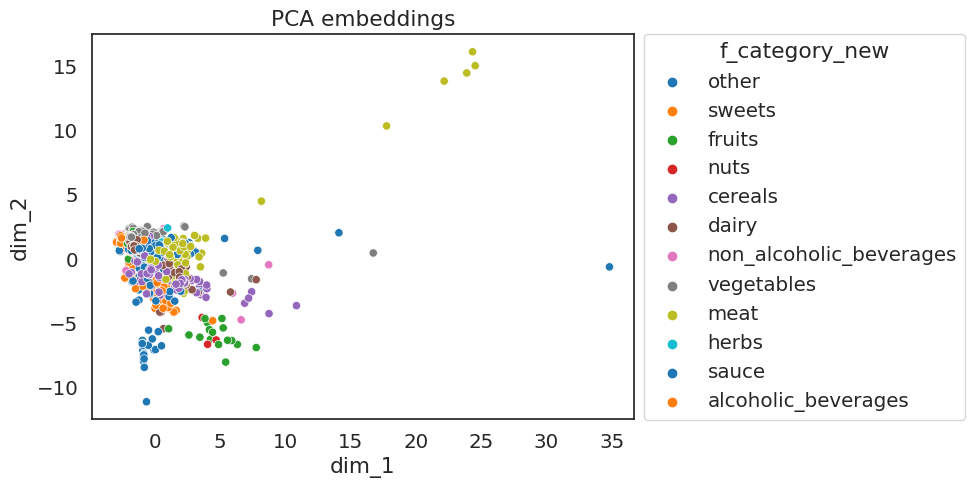

In [15]:
visualize_data(data_after_pca, 'PCA embeddings')

Trying UMAP

In [16]:
umap = UMAP(n_components=2, n_neighbors=20, random_state=0)
umap_components = pd.DataFrame(
    data=umap.fit_transform(new_df_scaled.iloc[:, 1:]), 
    columns=['dim_1', 'dim_2']
)

In [17]:
data_after_umap = pd.concat([umap_components, new_df_scaled.iloc[:, 0]], axis=1)
#data_after_umap

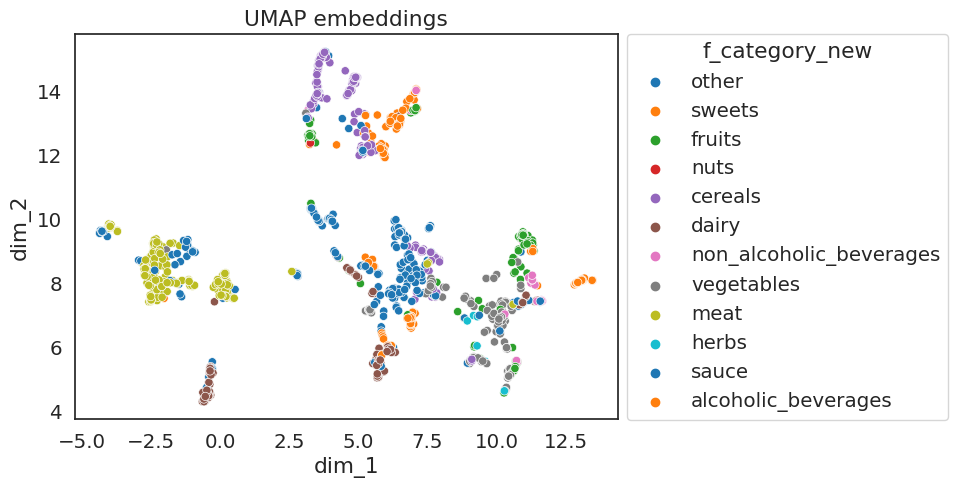

In [18]:
visualize_data(data_after_umap, 'UMAP embeddings')

Try tSNE

In [19]:
tsne = TSNE(n_components=2, perplexity=20)
tsne_components = pd.DataFrame(
    data=tsne.fit_transform(new_df_scaled.iloc[:, 1:]), 
    columns=['dim_1', 'dim_2']
)

In [20]:
data_after_tsne = pd.concat([tsne_components, new_df_scaled.iloc[:, 0]], axis=1)
#data_after_tsne

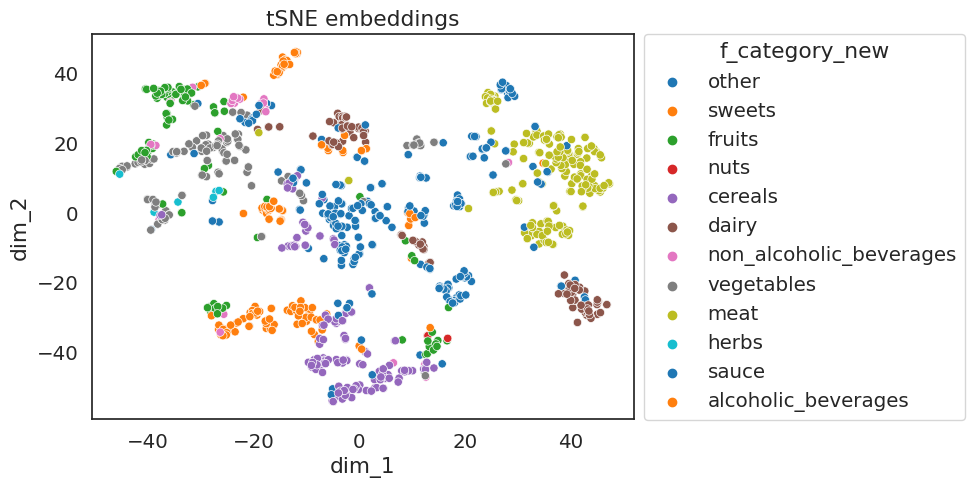

In [21]:
visualize_data(data_after_tsne, 'tSNE embeddings')